# House price prediction from Airbnb housing and socio-demographic indexes from New York City, 2017

* Brocco Mattia **|** 873058
* Piccolo Giulio **|** 874727

In [47]:
import dtale
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

import Data_cleaner as cle
%reload_ext autoreload
%autoreload 2

In [2]:
#################### IDEAS
# From Block, Lot and Borough CREATE a map to locate each building

In [3]:
### URL datasets
# https://www.kaggle.com/muonneutrino/new-york-city-census-data
# https://www.kaggle.com/new-york-city/nyc-property-sales#nyc-rolling-sales.csv

### Giulio
# filename = "/Users/giuliopiccolo/Desktop/lab/project/dataset/NYC_Airbnb_2017.csv"
# filename1 = "/Users/giuliopiccolo/Desktop/lab/project/dataset/NYC_house_price.csv"

### Mattia
# filename = "/Users/matti/Desktop/BA Second Year/3. Lab of Information systems and analytics/3. Project/NYC_Airbnb_2017.csv"
# filename1 = "/Users/matti/Desktop/BA Second Year/3. Lab of Information systems and analytics/3. Project/NYC_house_price.csv"

In [48]:
airbnb = pd.read_csv("/Users/giuliopiccolo/Desktop/lab/project/dataset/NYC_Airbnb_2017.csv", low_memory = False)
house_price = pd.read_csv("/Users/giuliopiccolo/Desktop/lab/project/dataset/NYC_house_price.csv")
crashes = pd.read_csv("/Users/giuliopiccolo/Desktop/lab/project/dataset/NYC_collision.csv", low_memory = False)

## Data cleaning of NYC House Price dataset

To assess the proportion to cut off the mean to compute the trimmed mean, we performed this analysis and the graphic result shows how a good approximation can be made at the cutoff of:
* 0.011 for "land_square_feet"
* 0.08 for "gross_square_feet"

```python
# This study was performed during data cleaning operations of the abovementioned dataframe
x_var = np.arange(0, 0.5, 0.001)
y_var = np.array( [round(scipy.stats.trim_mean(df_price['land_square_feet'], x), 3) for x in x_var] )
z_soglia = [1650 for x in range(len(x_var))] # visual check for interception with y_var

plt.figure(figsize=(15,6))
plt.plot(y_var, linewidth = 5, color = "#A4063E")
plt.plot(z_soglia, linewidth = 2, color = "blue")

def find_nearest(array, value):
    """
    * idx is the position (index) of the value we are looking for,
    using the function armin to find the minimum value
    * then return the actual value found
    """
    idx = (np.abs(array - value)).argmin()
    return array[idx]

y_var_list = list(y_var)
x_var_list = list(x_var)

# Visualize the threshold for the truncated mean
print(  x_var_list[y_var_list.index(find_nearest(y_var, z_soglia[0]))]  )
```

## Data cleasing of NYC house prices dataset

In [49]:
cleaner = cle.cleaners()
df_price = cleaner.house_price_cleaner(house_price)

df_price.ndim # get the dimension
df_price.dtypes # check the datatype of each colum to avoid surprise
df_price.info() # description of every column
df_price.describe() # quick overview about key indicators

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2831: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2831: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69607 entries, 0 to 69606
Data columns (total 20 columns):
borough                           69607 non-null int64
neighborhood                      69607 non-null object
building_class_category           69607 non-null object
tax_class_at_present              68934 non-null object
block                             69607 non-null int64
lot                               69607 non-null int64
building_class_at_present         68934 non-null object
address                           69607 non-null object
apartment_number                  69607 non-null object
zip_code                          69607 non-null int64
residential_units                 69607 non-null int64
commercial_units                  69607 non-null int64
total_units                       69607 non-null int64
land_square_feet                  69607 non-null int64
gross_square_feet                 69607 non-null int64
year_built                        64263 non-null float64
tax

,borough,block,lot,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,sale_price
count,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,6.960700e+04,6.960700e+04,64263.000000,69607.000000,6.960700e+04
mean,2.922996,4199.890140,374.580473,10741.159323,1.875070,0.164121,2.059319,3.212033e+03,2.908080e+03,1949.524781,1.640051,1.280703e+06
std,1.236549,3431.897518,656.232024,1264.804508,14.291398,8.997236,16.992716,3.314827e+04,2.423969e+04,34.687936,0.767824,1.143036e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,6.000000e+01,1111.000000,1.000000,0.000000e+00
25%,2.000000,1350.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.648000e+03,1.010000e+03,1925.000000,1.000000,2.300000e+05
50%,3.000000,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1.648000e+03,1.010000e+03,1944.000000,2.000000,5.330000e+05
75%,4.000000,6192.000000,820.000000,11249.000000,2.000000,0.000000,2.000000,2.500000e+03,2.057500e+03,1970.000000,2.000000,9.500000e+05
max,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


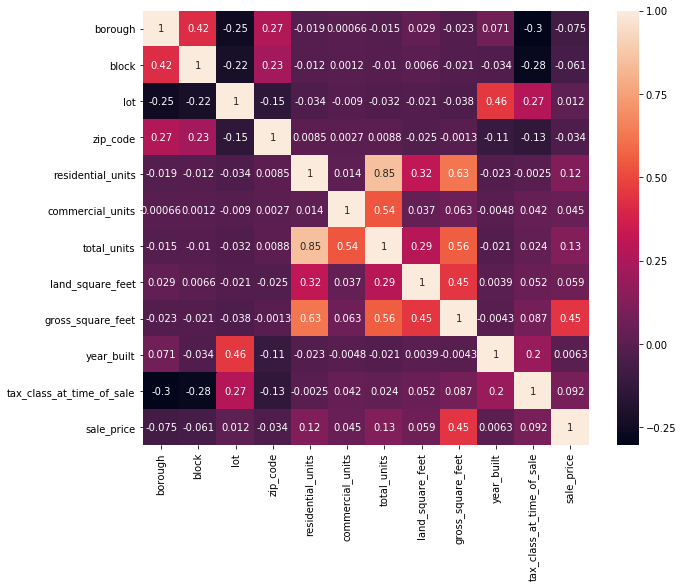

In [50]:
# Heatmap of correlations
plt.figure(figsize = (10,8))
corr = df_price.corr()
sns.heatmap(corr, annot = True)

#### Code to possibly slice dataset according to price thresholds
#df_sliced = df_price["sale_price"].copy()
#df_sliced_list = [x for x in df_sliced.tolist() if 100000 < x < 10000000]
#sns.distplot(df_sliced_list)

[100.0, 100.0, 100.0, 99.03, 100.0, 100.0, 99.03, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 92.32, 100.0, 100.0, 100.0, 100.0]


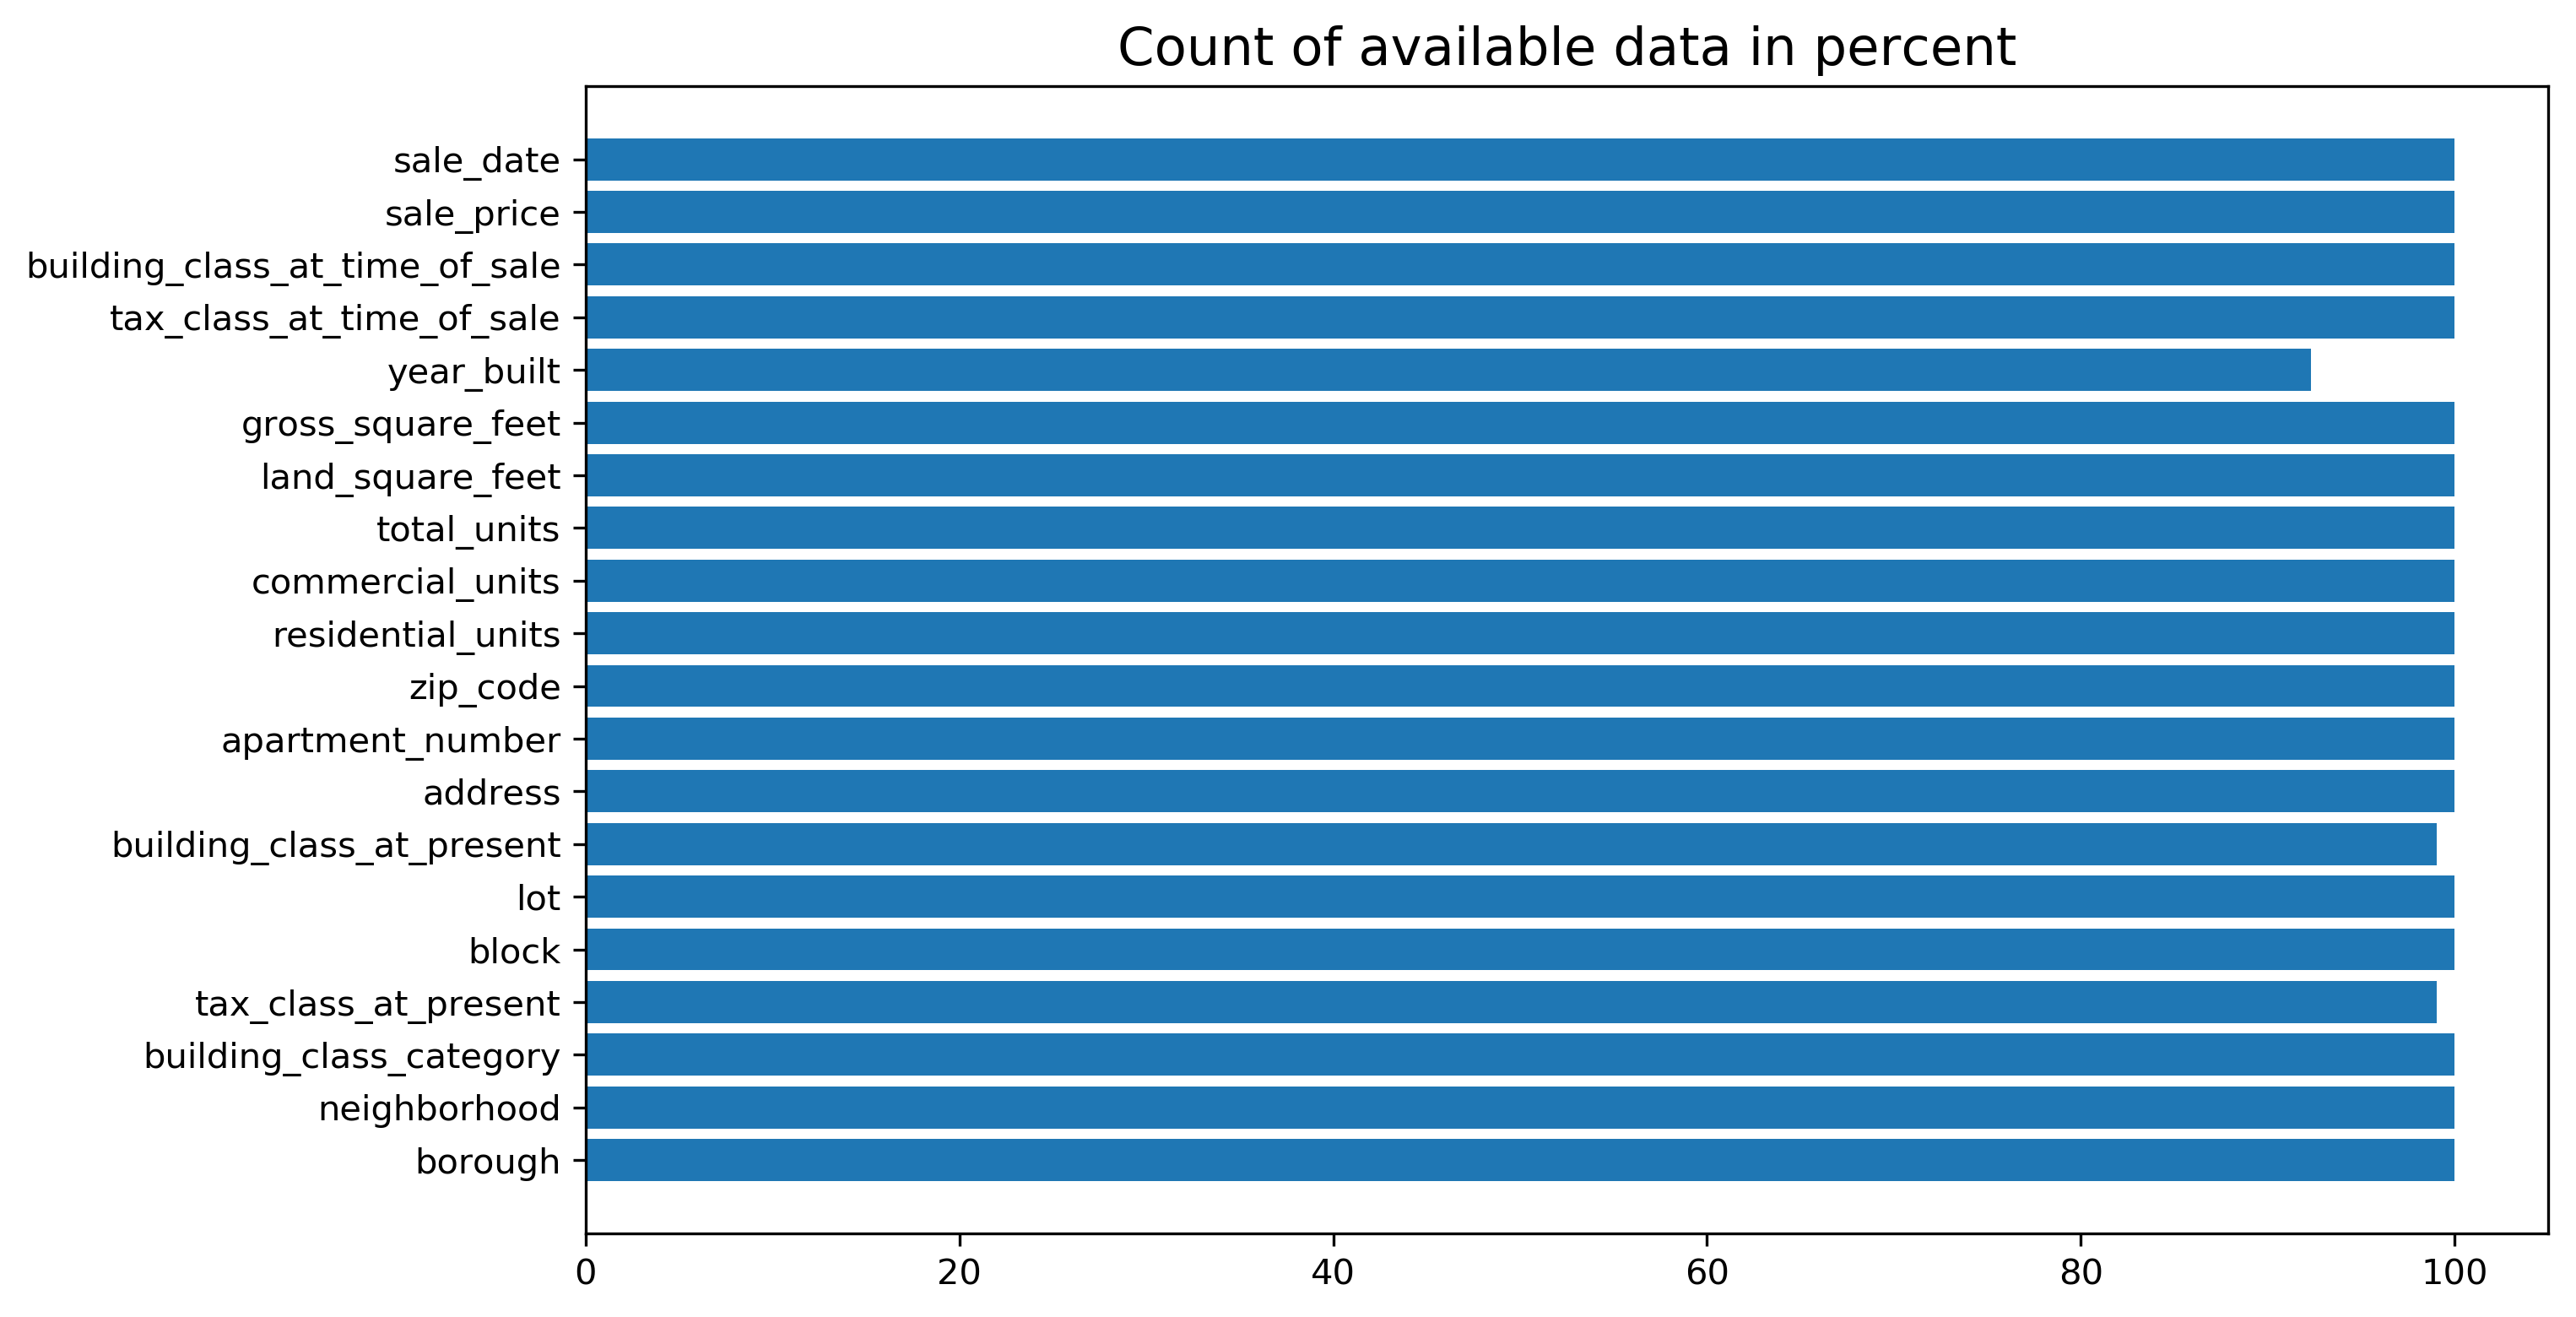

In [51]:
# Barplot of available values
gess = df_price.copy()
count = []
for var in gess.columns:
    length = gess[var].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(gess), 2)
print(count_pct.tolist())

plt.figure(figsize=(10,6), dpi = 300)
plt.barh(gess.columns, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

In [52]:
# TO ADD
# interative data visualization using plotly package (https://plot.ly)

### List of Boroughs and Neighborhoods

In [53]:
# o
mylist = df_price['neighborhood'].tolist()
mylist = list(dict.fromkeys(mylist))
print(len(mylist))

254


## Data cleasing of NYC car accidents dataset

In [54]:
df_crash = cleaner.crash_cleaner(crashes)
df_crash.head()

,accident_date,accident_time,borough,latitude,longitude,location,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,...,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2017-12-11,20:00,QUEENS,40.788548,-73.782040,"{'type': 'Point', 'coordinates': [-73.78204, 4...",0.0,0.0,0,0,...,Unsafe Lane Changing,Unspecified,None,None,None,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,None,None,None
1,2017-11-28,9:00,None,40.776450,-73.901670,"{'type': 'Point', 'coordinates': [-73.90167, 4...",0.0,0.0,0,0,...,Traffic Control Disregarded,Unspecified,None,None,None,PASSENGER VEHICLE,PICK-UP TRUCK,None,None,None
2,2017-11-25,13:50,None,40.836290,-73.949240,"{'type': 'Point', 'coordinates': [-73.94924, 4...",0.0,0.0,0,0,...,Unsafe Lane Changing,Other Vehicular,None,None,None,PASSENGER VEHICLE,PASSENGER VEHICLE,None,None,None
3,2017-12-02,18:15,None,40.637745,-74.076030,"{'type': 'Point', 'coordinates': [-74.07603, 4...",0.0,0.0,0,0,...,Driver Inattention/Distraction,Unspecified,None,None,None,PASSENGER VEHICLE,PASSENGER VEHICLE,None,None,None
4,2017-12-13,15:03,STATEN ISLAND,40.567060,-74.113205,"{'type': 'Point', 'coordinates': [-74.113205, ...",0.0,0.0,0,0,...,Failure to Yield Right-of-Way,Unspecified,None,None,None,SPORT UTILITY / STATION WAGON,None,None,None,None


In [55]:
#dtale.show(df_crash)

### How many missing values do we have?

The following plot is a nice way to visualize how many missing value are left into the df.

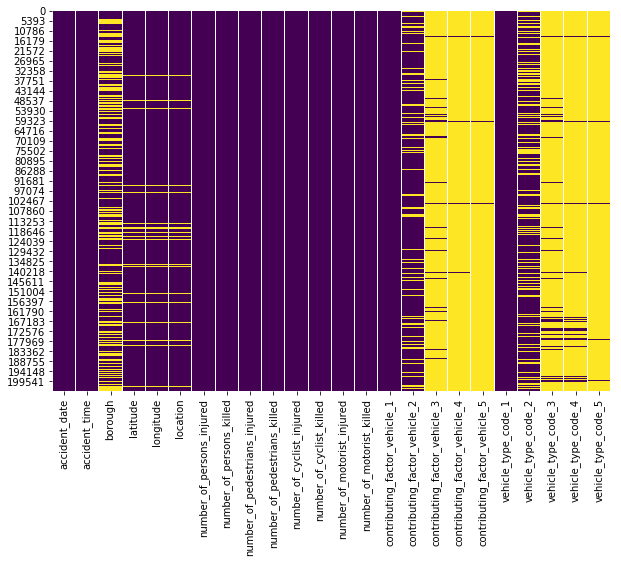

In [56]:
plt.figure(figsize=(10,7))
sns.heatmap(df_crash.isnull(), cbar = False, cmap = 'viridis')

- crashes that involve more than 2 vehicles are higly populated of missing values as expected, since normally crashes occour mostly between two vehicles
- the 'borough' column is not that good, but, since we have coordinate we can identify as well the borough name 

In [57]:
from math import cos, asin, sqrt

# Haversine formula
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # math.PI / 180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a)) #2 * R; R = 6371 km

# get the closest point 
def closest(data, v):
    return min(data, key=lambda p: distance(v[0], v[1], p[0], p[1]))



borough_dict = {"BRONX" : [40.837048, -73.865433], "BROOKLYN" : [40.650002, -73.949997], "MANHATTAN" : [40.758896, -73.985130], "QUEENS" : [40.742054,-73.769417], "STATEN ISLAND" : [40.579021,-74.151535]}
boroughs = [(*value, key) for key, value in borough_dict.items()]

df_crash['borough'] = df_crash.apply(
    lambda row: closest(boroughs, [row['latitude'], row['longitude']])[2] if row['borough'] is None else row['borough'],
axis=1
)

df_crash.head()

,accident_date,accident_time,borough,latitude,longitude,location,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,...,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2017-12-11,20:00,QUEENS,40.788548,-73.782040,"{'type': 'Point', 'coordinates': [-73.78204, 4...",0.0,0.0,0,0,...,Unsafe Lane Changing,Unspecified,None,None,None,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,None,None,None
1,2017-11-28,9:00,MANHATTAN,40.776450,-73.901670,"{'type': 'Point', 'coordinates': [-73.90167, 4...",0.0,0.0,0,0,...,Traffic Control Disregarded,Unspecified,None,None,None,PASSENGER VEHICLE,PICK-UP TRUCK,None,None,None
2,2017-11-25,13:50,BRONX,40.836290,-73.949240,"{'type': 'Point', 'coordinates': [-73.94924, 4...",0.0,0.0,0,0,...,Unsafe Lane Changing,Other Vehicular,None,None,None,PASSENGER VEHICLE,PASSENGER VEHICLE,None,None,None
3,2017-12-02,18:15,STATEN ISLAND,40.637745,-74.076030,"{'type': 'Point', 'coordinates': [-74.07603, 4...",0.0,0.0,0,0,...,Driver Inattention/Distraction,Unspecified,None,None,None,PASSENGER VEHICLE,PASSENGER VEHICLE,None,None,None
4,2017-12-13,15:03,STATEN ISLAND,40.567060,-74.113205,"{'type': 'Point', 'coordinates': [-74.113205, ...",0.0,0.0,0,0,...,Failure to Yield Right-of-Way,Unspecified,None,None,None,SPORT UTILITY / STATION WAGON,None,None,None,None


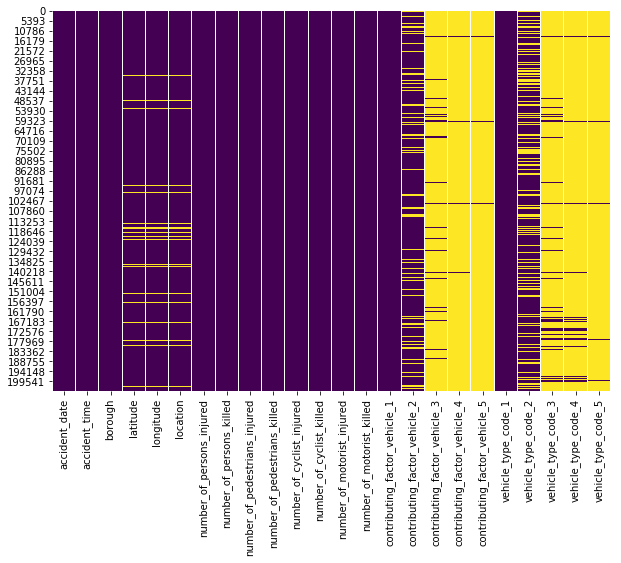

In [58]:
# check how many values did you correctely replace
# ok, try not to cry
plt.figure(figsize=(10,7))
sns.heatmap(df_crash.isnull(), cbar = False, cmap = 'viridis')

In [63]:
from math import cos, asin, sqrt
import pandas as pd

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    return min(data, key=lambda p: distance(v[0], v[1], p[0], p[1]))


df = pd.DataFrame(
    [
     {'borough': 'bronx', 'lat': 40.79, 'long': -73.78}, 
     {'borough': 'manhattan', 'lat': 40.78, 'long': -73.90},
     {'borough': None, 'lat': 40.57, 'long': -74.11}
     ],
)


borough_dict = {"Bronx" : [40.837048, -73.865433], "Brooklyn" : [40.650002, -73.949997], "Manhattan" : [40.758896, -73.985130], "Queens" : [40.742054,-73.769417], "Staten Island" : [40.579021,-74.151535]}
boroughs = [(*value, key) for key, value in borough_dict.items()]


df['borough'] = df.apply(
lambda row: closest(boroughs, [row['lat'], row['long']])[2] if row['borough'] is None else row['borough'],
axis=1
)

print(df)

         borough    lat   long
0          bronx  40.79 -73.78
1      manhattan  40.78 -73.90
2  Staten Island  40.57 -74.11


The "census" dataframe required only a little effort in cleasing operations, as shown through the chunck below, which output is $1.673 \% $
```python
print("Missing values: ",  df_blocks.isnull().sum().sum() , " | Perc of total: ",
      round(100*df_blocks.isnull().sum().sum() / (df_blocks.shape[0]*df_blocks.shape[1]), 3))
```
So, we decided to all drop the rows that presented NaN values, since they represent only a small share of the total (72 over 2167. i.e. $3.32 \% $). <br><br> With the same formula we noticed that the dataframe with all the coordinates is completely full.

## Data cleasing of Airbnbs of NYC dataset

With the same formula used before we noticed that also Airbnb dataset is characterized by a very low rate of empty cells, that is  $2.741 \% $.

```python
total = df1.isnull().sum().sort_values(ascending = False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis = 1, keys = ['NAs', 'Percent']) # df with columns, nan values and %
plt.plot( missing_data['Percent'] )
missing_data.drop(missing_data[missing_data.Percent < 0.2].index, inplace = True)
```
After a further evaluation of the columns, we assessed that only ```"reviews_per_month"``` and ```"last_review"``` had more than more than 20% of the whole column filled with NaN values. So, we dropped those two columns and used ```.dropna()``` to delete other few rows with any NaN values.

In [ ]:
df_airbnb = cleaner.airbnb_cleaner(airbnb)
df_airbnb.shape

## First try of ML Prediction

Steps to follow:
1. Descriptive analysis on the Data – 50% time
2. Data treatment (Missing value and outlier fixing) – 40% time
3. Data Modelling – 4% time
4. Estimation of performance – 6% time


STEP 1:
1. Identify ID, Input (columns of df_price) and Target (house price) features
2. Identify categorical and numerical features
3. Identify columns with missing values (already done)

In [ ]:
price_train = df_price.copy()
price_train = price_train.loc[0:500]

In [ ]:
df_census.iloc[1]

In [ ]:
price_train.dtypes

In [ ]:
r = np.corrcoef(price_train["total_units"],
                price_train["sale_price"])
r

In [ ]:
plt.scatter(price_train["total_units"],
                price_train["sale_price"])

In [ ]:
print( len([val for val in df_price["sale_price"] if val < 5000]) )

In [ ]:
len(np.arange(2000000, 200000000, 5000))

In [ ]:
x_var = np.arange(2000000, 200000000, 5000)
y_var = np.array( [len( [val for val in df_price["sale_price"] if val < x] ) for x in x_var] )
#z_soglia = [1650 for x in range(len(x_var))] # visual check for interception with y_var

plt.figure(figsize=(18,7))
plt.title("Andamento del numero di righe rispetto alla soglia fissata (x < soglia)")
plt.axvline(x = 2000000, color = "red", linewidth = 2)
#plt.plot(y_var, linewidth = 5, color = "#A4063E")
plt.scatter(x_var, y_var)
#plt.plot(y_var, linewidth = 5, color = "#A4063E")
#plt.plot(z_soglia, linewidth = 2, color = "blue")

In [ ]:
price_over_2M = [x for x in df_price["sale_price"].tolist() if 2000000 < x < 200000000]
price_over_2M[0]

In [ ]:
sns.distplot(price_over_2M, axlabel = "sale_price")

In [ ]:
sns.kdeplot([x for x in df_price["sale_price"].tolist() if 10000 < x < 2000000])
sns.kdeplot([x for x in df_price["sale_price"].tolist() if 20000 < x < 2000000])
sns.kdeplot([x for x in df_price["sale_price"].tolist() if 50000 < x < 2000000])
#sns.kdeplot([x for x in df_price["sale_price"].tolist() if 1000000 < x < 2000000])

In [ ]:
sns.distplot([x for x in df_price["sale_price"].tolist() if 10000 < x < 2000000], axlabel = "sale_price")

In [ ]:
max(df_price["sale_price"])

In [ ]:
asse_x = range(69607)
asse_y = sorted(df_price["sale_price"])
plt.scatter(asse_x, asse_y)

In [ ]:
list_price = df_price['neighborhood'].tolist()
list_price = list(dict.fromkeys(list_price))
list_price  = [x.lower() for x in list_price]

list_census = df_census["County"].tolist()
list_census = list(dict.fromkeys(list_census))

list_df1 = df1["neighbourhood"].tolist()
list_df1 = list(dict.fromkeys(list_df1))
list_df1  = [x.lower() for x in list_df1]

In [ ]:
print(list_price)

In [ ]:
print(list_df1)

In [ ]:
list_census_state = df_blocks["State"].tolist()
list_census_state = list(dict.fromkeys(list_census_state))

In [ ]:
list_census_state

In [ ]:
print( len([x for x in list_price if x in list_df1]) )